In [1]:
import pandas as pd

/Users/nikolasjackaltran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nikolasjackaltran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Sleep dataset

In [36]:
df = pd.read_csv('Sleep_Health_and_Lifestyle_Dataset.csv')

In [3]:
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [4]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

## Transform
- Physical activity and stress level and q of sleep to an intuitive scale( look up )
- drop person id 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Sleep disorder
- Int
- Convert NAs to 0

In [6]:
import seaborn as sns

#### Transformations

In [7]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [8]:
gender_map = {'Male': '0','Female': '1' }
df['Gender'] = df['Gender'].map(gender_map)

In [9]:
BMI_map = {'Overweight':1, 'Normal':0, 'Obese':2, 'Normal Weight':0 }
df['BMI Category'] = df['BMI Category'].map(BMI_map)

In [10]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [37]:
df["Sleep Disorder"] = df["Sleep Disorder"].notna()
df["Sleep Disorder"] = df["Sleep Disorder"].astype(int)

In [38]:
df_num = df.drop(['Occupation', 'Blood Pressure'], axis =1)

In [39]:
df_num

Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1    Male   27             6.1                 6   
1            2    Male   28             6.2                 6   
2            3    Male   28             6.2                 6   
3            4    Male   28             5.9                 4   
4            5    Male   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370  Female   59             8.1                 9   
370        371  Female   59             8.0                 9   
371        372  Female   59             8.1                 9   
372        373  Female   59             8.1                 9   
373        374  Female   59             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                         42             6   Overweight          77   
1                         60             8       Normal          75   
2                         60             8       Normal          75   
3                         30             8        Obese          85   
4                         30             8        Obese          85   
..                       ...           ...          ...         ...   
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily Steps  Sleep Disorder  
0           4200               0  
1          10000               0  
2          10000               0  
3           3000               1  
4           3000               1  
..           ...             ...  
369         7000               1  
370         7000               1  
371         7000               1  
372         7000               1  
373         7000               1  

[374 rows x 11 columns]

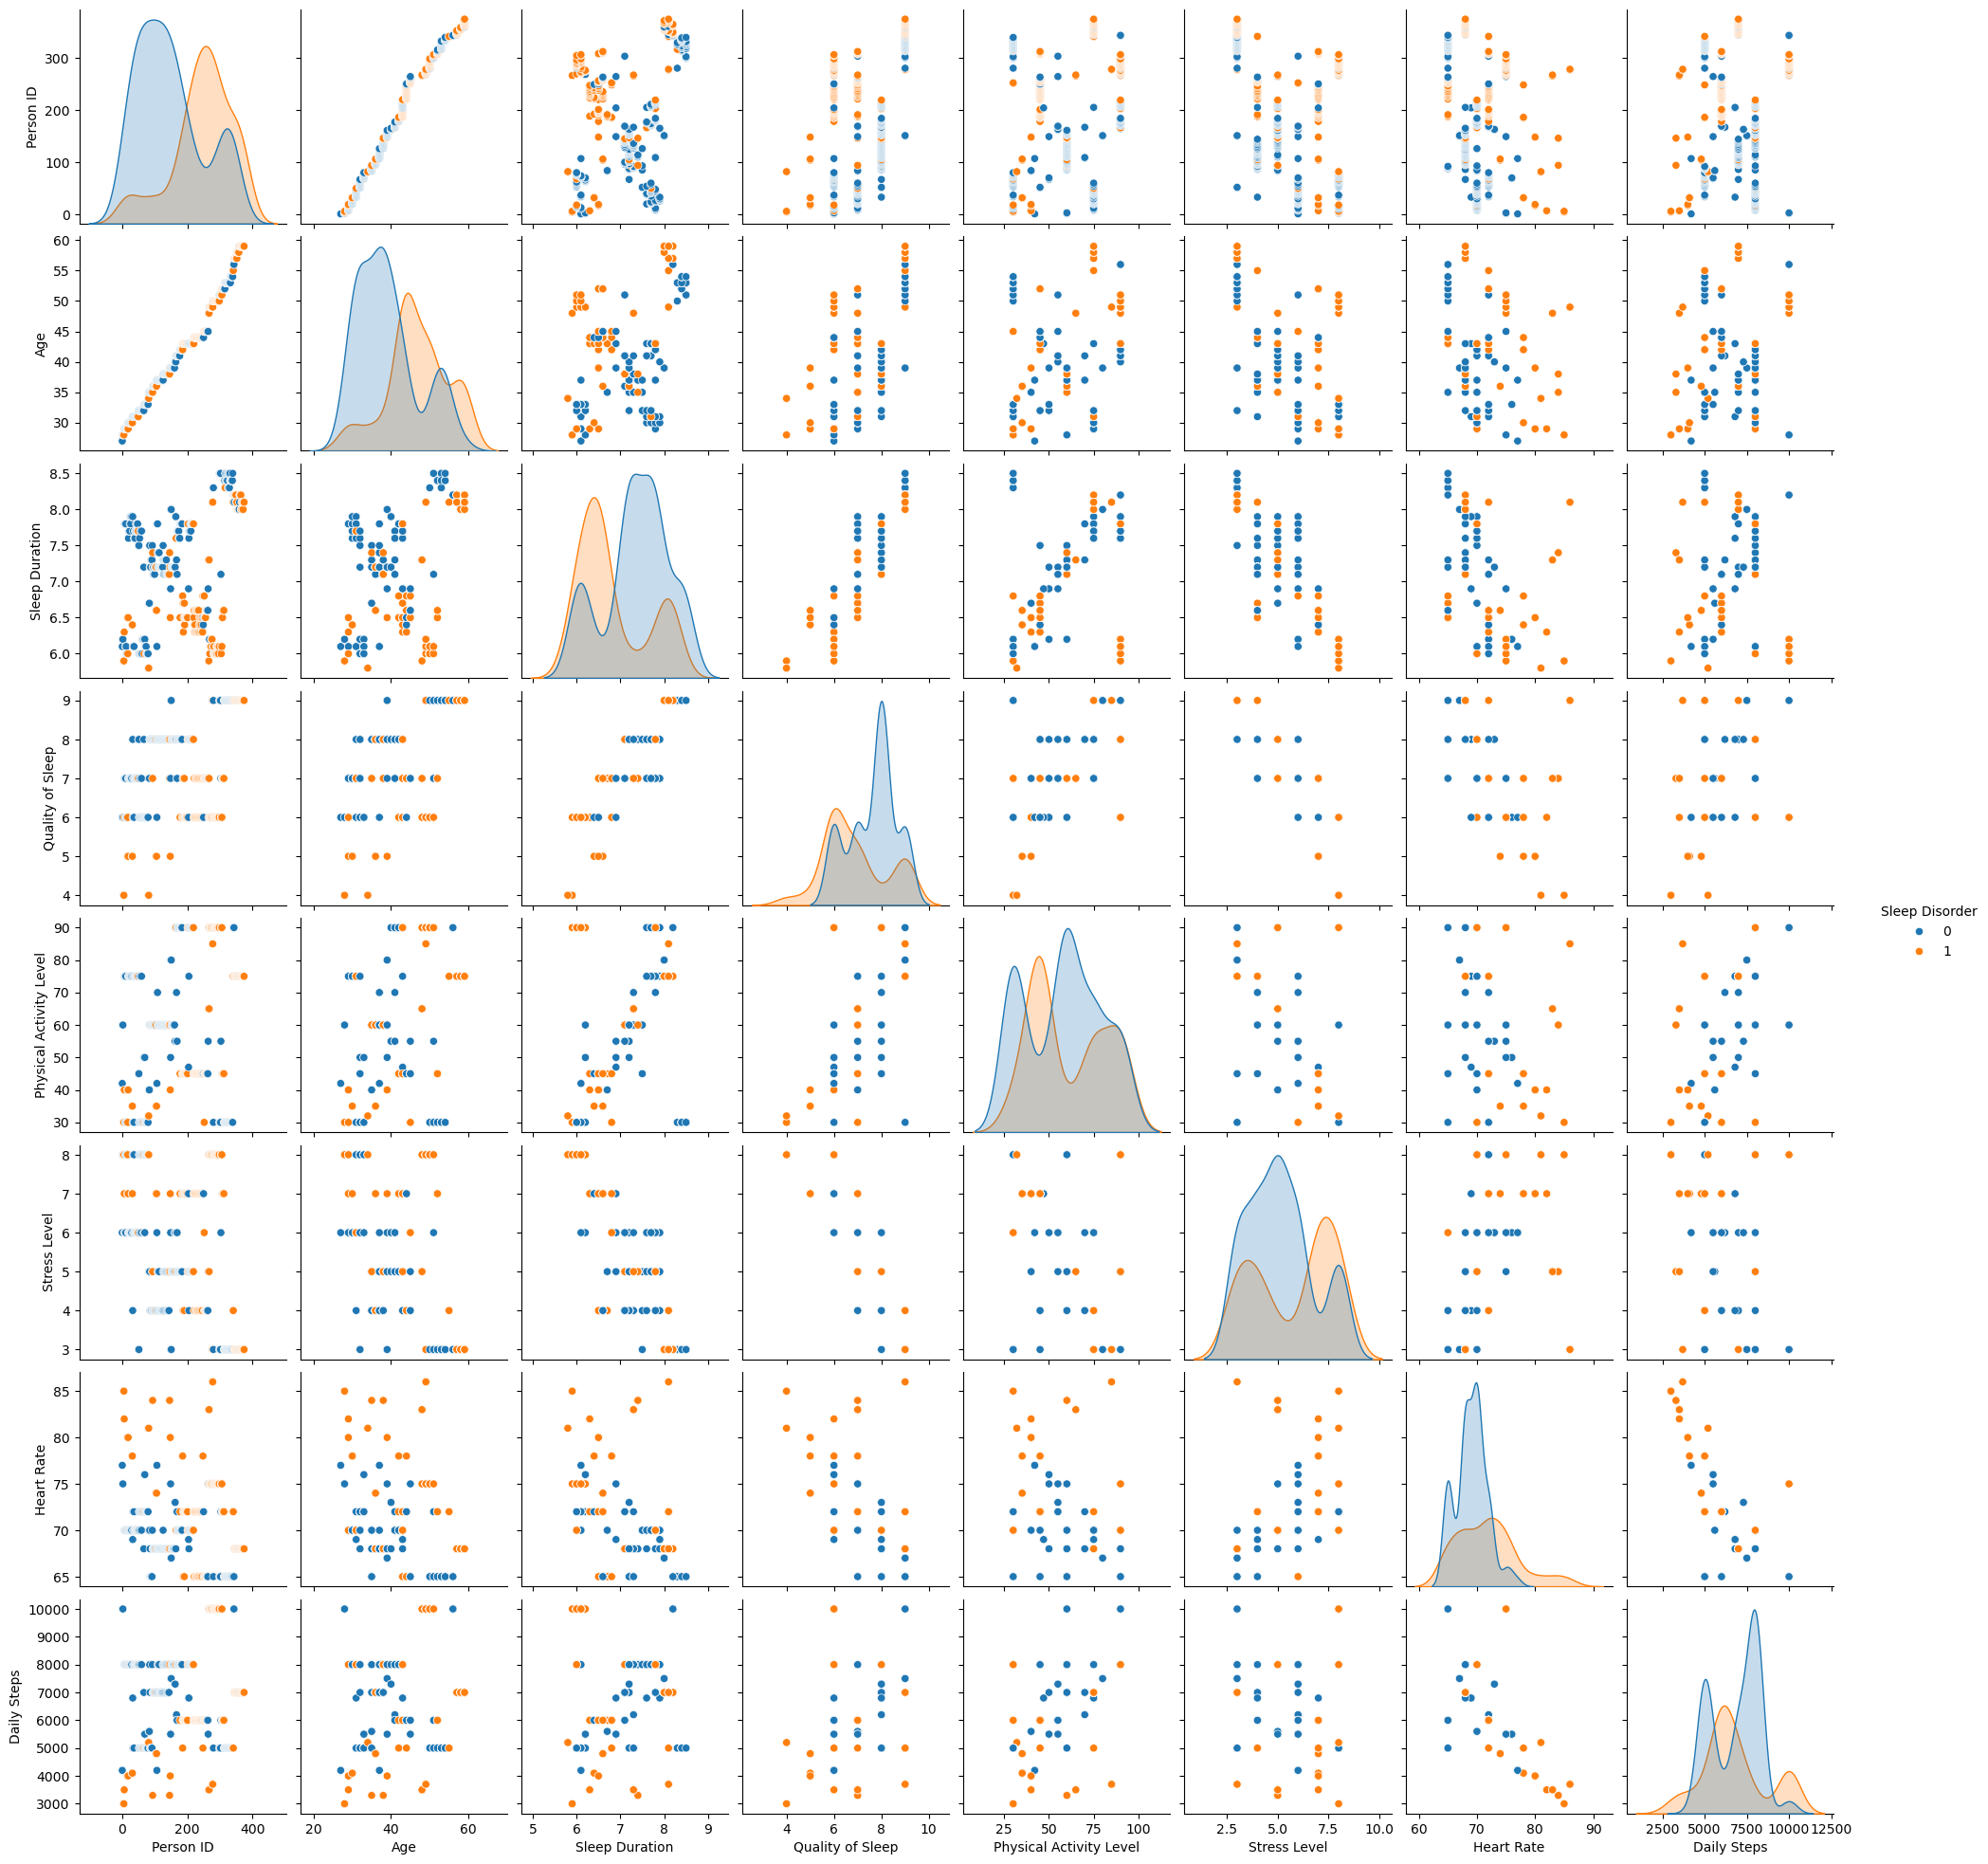

In [40]:
sns.pairplot(df_num, hue= "Sleep Disorder")

In [15]:
corr = df_num.corr()

In [16]:
corr

Person ID    Gender       Age  Sleep Duration  \
Person ID                 1.000000  0.584229  0.990516        0.296305   
Gender                    0.584229  1.000000  0.596358        0.121579   
Age                       0.990516  0.596358  1.000000        0.344709   
Sleep Duration            0.296305  0.121579  0.344709        1.000000   
Quality of Sleep          0.431612  0.291366  0.473734        0.883213   
Physical Activity Level   0.149882 -0.001454  0.178993        0.212360   
Stress Level             -0.394287 -0.396018 -0.422344       -0.811023   
BMI Category              0.442905  0.242743  0.427704       -0.349605   
Heart Rate               -0.225467 -0.217105 -0.225606       -0.516455   
Daily Steps               0.043844  0.014509  0.057973       -0.039533   
Sleep Disorder            0.446196  0.285824  0.432007       -0.338622   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Gender                           0.291366                -0.001454   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896                 1.000000   
Stress Level                    -0.898752                -0.034134   
BMI Category                    -0.324413                 0.052076   
Heart Rate                      -0.659865                 0.136971   
Daily Steps                      0.016791                 0.772723   
Sleep Disorder                  -0.310984                 0.069787   

                         Stress Level  BMI Category  Heart Rate  Daily Steps  \
Person ID                   -0.394287      0.442905   -0.225467     0.043844   
Gender                      -0.396018      0.242743   -0.217105     0.014509   
Age                         -0.422344      0.427704   -0.225606     0.057973   
Sleep Duration              -0.811023     -0.349605   -0.516455    -0.039533   
Quality of Sleep            -0.898752     -0.324413   -0.659865     0.016791   
Physical Activity Level     -0.034134      0.052076    0.136971     0.772723   
Stress Level                 1.000000      0.157649    0.670026     0.186829   
BMI Category                 0.157649      1.000000    0.469897    -0.142785   
Heart Rate                   0.670026      0.469897    1.000000    -0.030309   
Daily Steps                  0.186829     -0.142785   -0.030309     1.000000   
Sleep Disorder               0.181685      0.785389    0.330254    -0.026575   

                         Sleep Disorder  
Person ID                      0.446196  
Gender                         0.285824  
Age                            0.432007  
Sleep Duration                -0.338622  
Quality of Sleep              -0.310984  
Physical Activity Level        0.069787  
Stress Level                   0.181685  
BMI Category                   0.785389  
Heart Rate                     0.330254  
Daily Steps                   -0.026575  
Sleep Disorder                 1.000000

<AxesSubplot:>

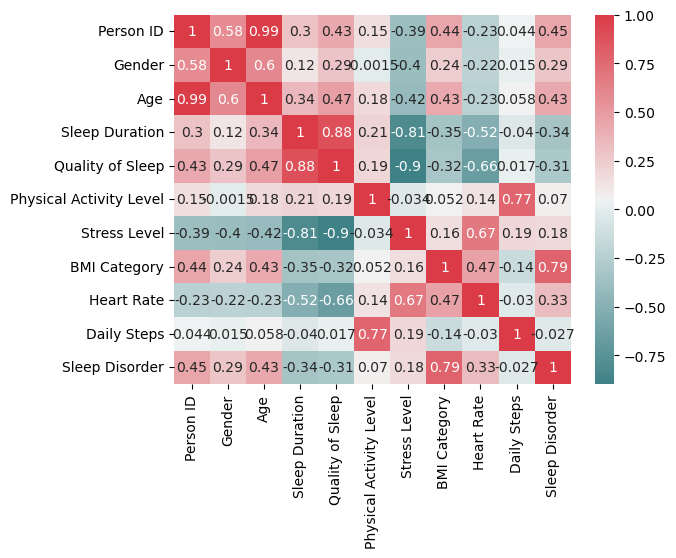

In [17]:
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)

## Sleep disorder summary

Interesting data on BMI corr to Sleep disoreder and sleep quality heart rate and stress

## Health and Lifestyle

In [18]:
df_1 = pd.read_csv('health_lifestyle_dataset.csv')

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [20]:
df_1.head(10)

id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   
5   6   25    Male  27.3        19495          5.0             4.4   
6   7   78  Female  37.1        16739          9.5             4.2   
7   8   38  Female  18.9         1726          4.8             1.7   
8   9   56  Female  18.2         1764          5.1             1.5   
9  10   75    Male  23.5         9730          4.5             0.7   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   
5               1301       0        1          73          107            65   
6               3478       1        0          90          110           102   
7               3212       0        1          64          113           109   
8               3740       0        1          91          112            61   
9               3571       0        1          54          177            90   

   cholesterol  family_history  disease_risk  
0          240               0             0  
1          207               0             0  
2          296               0             0  
3          175               0             0  
4          294               0             0  
5          284               0             0  
6          201               0             0  
7          197               0             0  
8          237               1             0  
9          157               1             0

In [21]:
df_1.describe()

id            age            bmi   daily_steps  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean    50000.500000      48.525990      29.024790   10479.87029   
std     28867.657797      17.886768       6.352666    5483.63236   
min         1.000000      18.000000      18.000000    1000.00000   
25%     25000.750000      33.000000      23.500000    5729.00000   
50%     50000.500000      48.000000      29.000000   10468.00000   
75%     75000.250000      64.000000      34.500000   15229.00000   
max    100000.000000      79.000000      40.000000   19999.00000   

         sleep_hours  water_intake_l  calories_consumed         smoker  \
count  100000.000000   100000.000000      100000.000000  100000.000000   
mean        6.491784        2.751496        2603.341200       0.200940   
std         2.021922        1.297338         807.288563       0.400705   
min         3.000000        0.500000        1200.000000       0.000000   
25%         4.700000        1.600000        1906.000000       0.000000   
50%         6.500000        2.800000        2603.000000       0.000000   
75%         8.200000        3.900000        3299.000000       0.000000   
max        10.000000        5.000000        3999.000000       1.000000   

             alcohol     resting_hr   systolic_bp   diastolic_bp  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.300020      74.457420     134.58063      89.508850   
std         0.458269      14.423715      25.95153      17.347041   
min         0.000000      50.000000      90.00000      60.000000   
25%         0.000000      62.000000     112.00000      74.000000   
50%         0.000000      74.000000     135.00000      89.000000   
75%         1.000000      87.000000     157.00000     105.000000   
max         1.000000      99.000000     179.00000     119.000000   

         cholesterol  family_history   disease_risk  
count  100000.000000   100000.000000  100000.000000  
mean      224.300630        0.299150       0.248210  
std        43.327749        0.457888       0.431976  
min       150.000000        0.000000       0.000000  
25%       187.000000        0.000000       0.000000  
50%       224.000000        0.000000       0.000000  
75%       262.000000        1.000000       0.000000  
max       299.000000        1.000000       1.000000

In [22]:
gender_map = {'Male': '0','Female': '1'}
df_1['gender'] = df_1['gender'].map(gender_map)
df_1_small = df_1.drop(['id', 'age', 'family_history'], axis =1)

In [23]:
df_1

id  age gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0           1   56      0  20.5         4198          3.9             3.4   
1           2   69      1  33.3        14359          9.0             4.7   
2           3   46      0  31.6         1817          6.6             4.2   
3           4   32      1  38.2        15772          3.6             2.0   
4           5   60      1  33.6         6037          3.8             4.0   
...       ...  ...    ...   ...          ...          ...             ...   
99995   99996   53      0  33.1         4726          3.9             2.0   
99996   99997   22      0  35.1        11554          4.5             3.1   
99997   99998   37      0  18.9         3924          3.8             1.0   
99998   99999   72      1  27.8        16110          5.6             0.8   
99999  100000   37      0  35.4         8222          9.1             1.8   

       calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
0                   1602       0        0          97          161   
1                   2346       0        1          68          116   
2                   1643       0        1          90          123   
3                   2460       0        0          71          165   
4                   3756       0        1          98          139   
...                  ...     ...      ...         ...          ...   
99995               3118       0        1          56          105   
99996               1967       0        0          51          149   
99997               2328       0        0          69           92   
99998               3093       0        0          93          164   
99999               3942       0        1          71          145   

       diastolic_bp  cholesterol  family_history  disease_risk  
0               111          240               0             0  
1                65          207               0             0  
2                99          296               0             0  
3                95          175               0             0  
4                61          294               0             0  
...             ...          ...             ...           ...  
99995            76          282               0             0  
99996            77          192               0             0  
99997           117          218               0             0  
99998            72          188               0             0  
99999            80          276               0             1  

[100000 rows x 16 columns]

In [41]:
corr=df_1_small.corr()
corr

gender       bmi  daily_steps  sleep_hours  \
gender             1.000000  0.000379    -0.001245     0.003120   
bmi                0.000379  1.000000     0.001814     0.000922   
daily_steps       -0.001245  0.001814     1.000000    -0.001209   
sleep_hours        0.003120  0.000922    -0.001209     1.000000   
water_intake_l     0.003173 -0.003634    -0.000898     0.001507   
calories_consumed  0.000580  0.002262     0.000306     0.001229   
smoker             0.002921 -0.003406     0.000453     0.001055   
alcohol           -0.004643  0.002138     0.003456    -0.006332   
resting_hr         0.001730 -0.006327     0.004401     0.002628   
systolic_bp       -0.002609  0.000806    -0.002049     0.000180   
diastolic_bp      -0.000523 -0.003100    -0.003537     0.002243   
cholesterol       -0.001240  0.002045     0.000123     0.003051   
disease_risk       0.001957  0.003586    -0.003444     0.002582   

                   water_intake_l  calories_consumed    smoker   alcohol  \
gender                   0.003173           0.000580  0.002921 -0.004643   
bmi                     -0.003634           0.002262 -0.003406  0.002138   
daily_steps             -0.000898           0.000306  0.000453  0.003456   
sleep_hours              0.001507           0.001229  0.001055 -0.006332   
water_intake_l           1.000000          -0.007590  0.001555  0.003664   
calories_consumed       -0.007590           1.000000  0.002223  0.005630   
smoker                   0.001555           0.002223  1.000000  0.002472   
alcohol                  0.003664           0.005630  0.002472  1.000000   
resting_hr               0.000872           0.000889 -0.001439  0.004570   
systolic_bp             -0.003237          -0.000171  0.003652 -0.004618   
diastolic_bp            -0.001321           0.004270 -0.007331  0.003478   
cholesterol              0.002576          -0.005218  0.000999 -0.003599   
disease_risk            -0.001902           0.002737  0.001125  0.000515   

                   resting_hr  systolic_bp  diastolic_bp  cholesterol  \
gender               0.001730    -0.002609     -0.000523    -0.001240   
bmi                 -0.006327     0.000806     -0.003100     0.002045   
daily_steps          0.004401    -0.002049     -0.003537     0.000123   
sleep_hours          0.002628     0.000180      0.002243     0.003051   
water_intake_l       0.000872    -0.003237     -0.001321     0.002576   
calories_consumed    0.000889    -0.000171      0.004270    -0.005218   
smoker              -0.001439     0.003652     -0.007331     0.000999   
alcohol              0.004570    -0.004618      0.003478    -0.003599   
resting_hr           1.000000     0.000791     -0.001756    -0.001721   
systolic_bp          0.000791     1.000000     -0.002257     0.006215   
diastolic_bp        -0.001756    -0.002257      1.000000     0.001072   
cholesterol         -0.001721     0.006215      0.001072     1.000000   
disease_risk         0.005437     0.001086     -0.003774    -0.003941   

                   disease_risk  
gender                 0.001957  
bmi                    0.003586  
daily_steps           -0.003444  
sleep_hours            0.002582  
water_intake_l        -0.001902  
calories_consumed      0.002737  
smoker                 0.001125  
alcohol                0.000515  
resting_hr             0.005437  
systolic_bp            0.001086  
diastolic_bp          -0.003774  
cholesterol           -0.003941  
disease_risk           1.000000

In [25]:
df_1_small

gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0          0  20.5         4198          3.9             3.4   
1          1  33.3        14359          9.0             4.7   
2          0  31.6         1817          6.6             4.2   
3          1  38.2        15772          3.6             2.0   
4          1  33.6         6037          3.8             4.0   
...      ...   ...          ...          ...             ...   
99995      0  33.1         4726          3.9             2.0   
99996      0  35.1        11554          4.5             3.1   
99997      0  18.9         3924          3.8             1.0   
99998      1  27.8        16110          5.6             0.8   
99999      0  35.4         8222          9.1             1.8   

       calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
0                   1602       0        0          97          161   
1                   2346       0        1          68          116   
2                   1643       0        1          90          123   
3                   2460       0        0          71          165   
4                   3756       0        1          98          139   
...                  ...     ...      ...         ...          ...   
99995               3118       0        1          56          105   
99996               1967       0        0          51          149   
99997               2328       0        0          69           92   
99998               3093       0        0          93          164   
99999               3942       0        1          71          145   

       diastolic_bp  cholesterol  disease_risk  
0               111          240             0  
1                65          207             0  
2                99          296             0  
3                95          175             0  
4                61          294             0  
...             ...          ...           ...  
99995            76          282             0  
99996            77          192             0  
99997           117          218             0  
99998            72          188             0  
99999            80          276             1  

[100000 rows x 13 columns]

<AxesSubplot:>

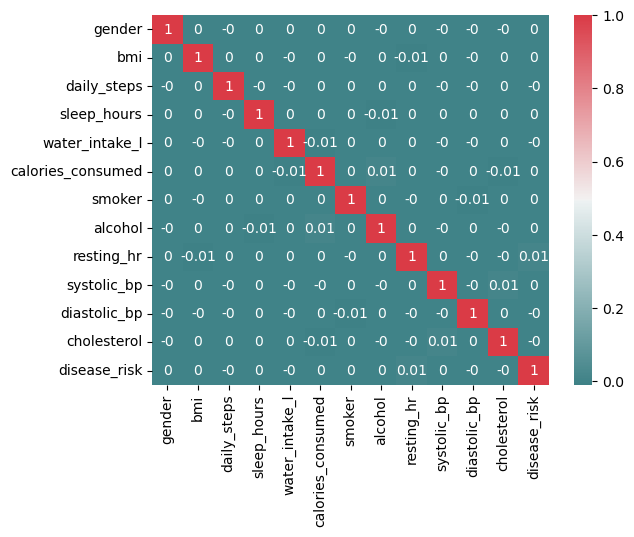

In [26]:
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)

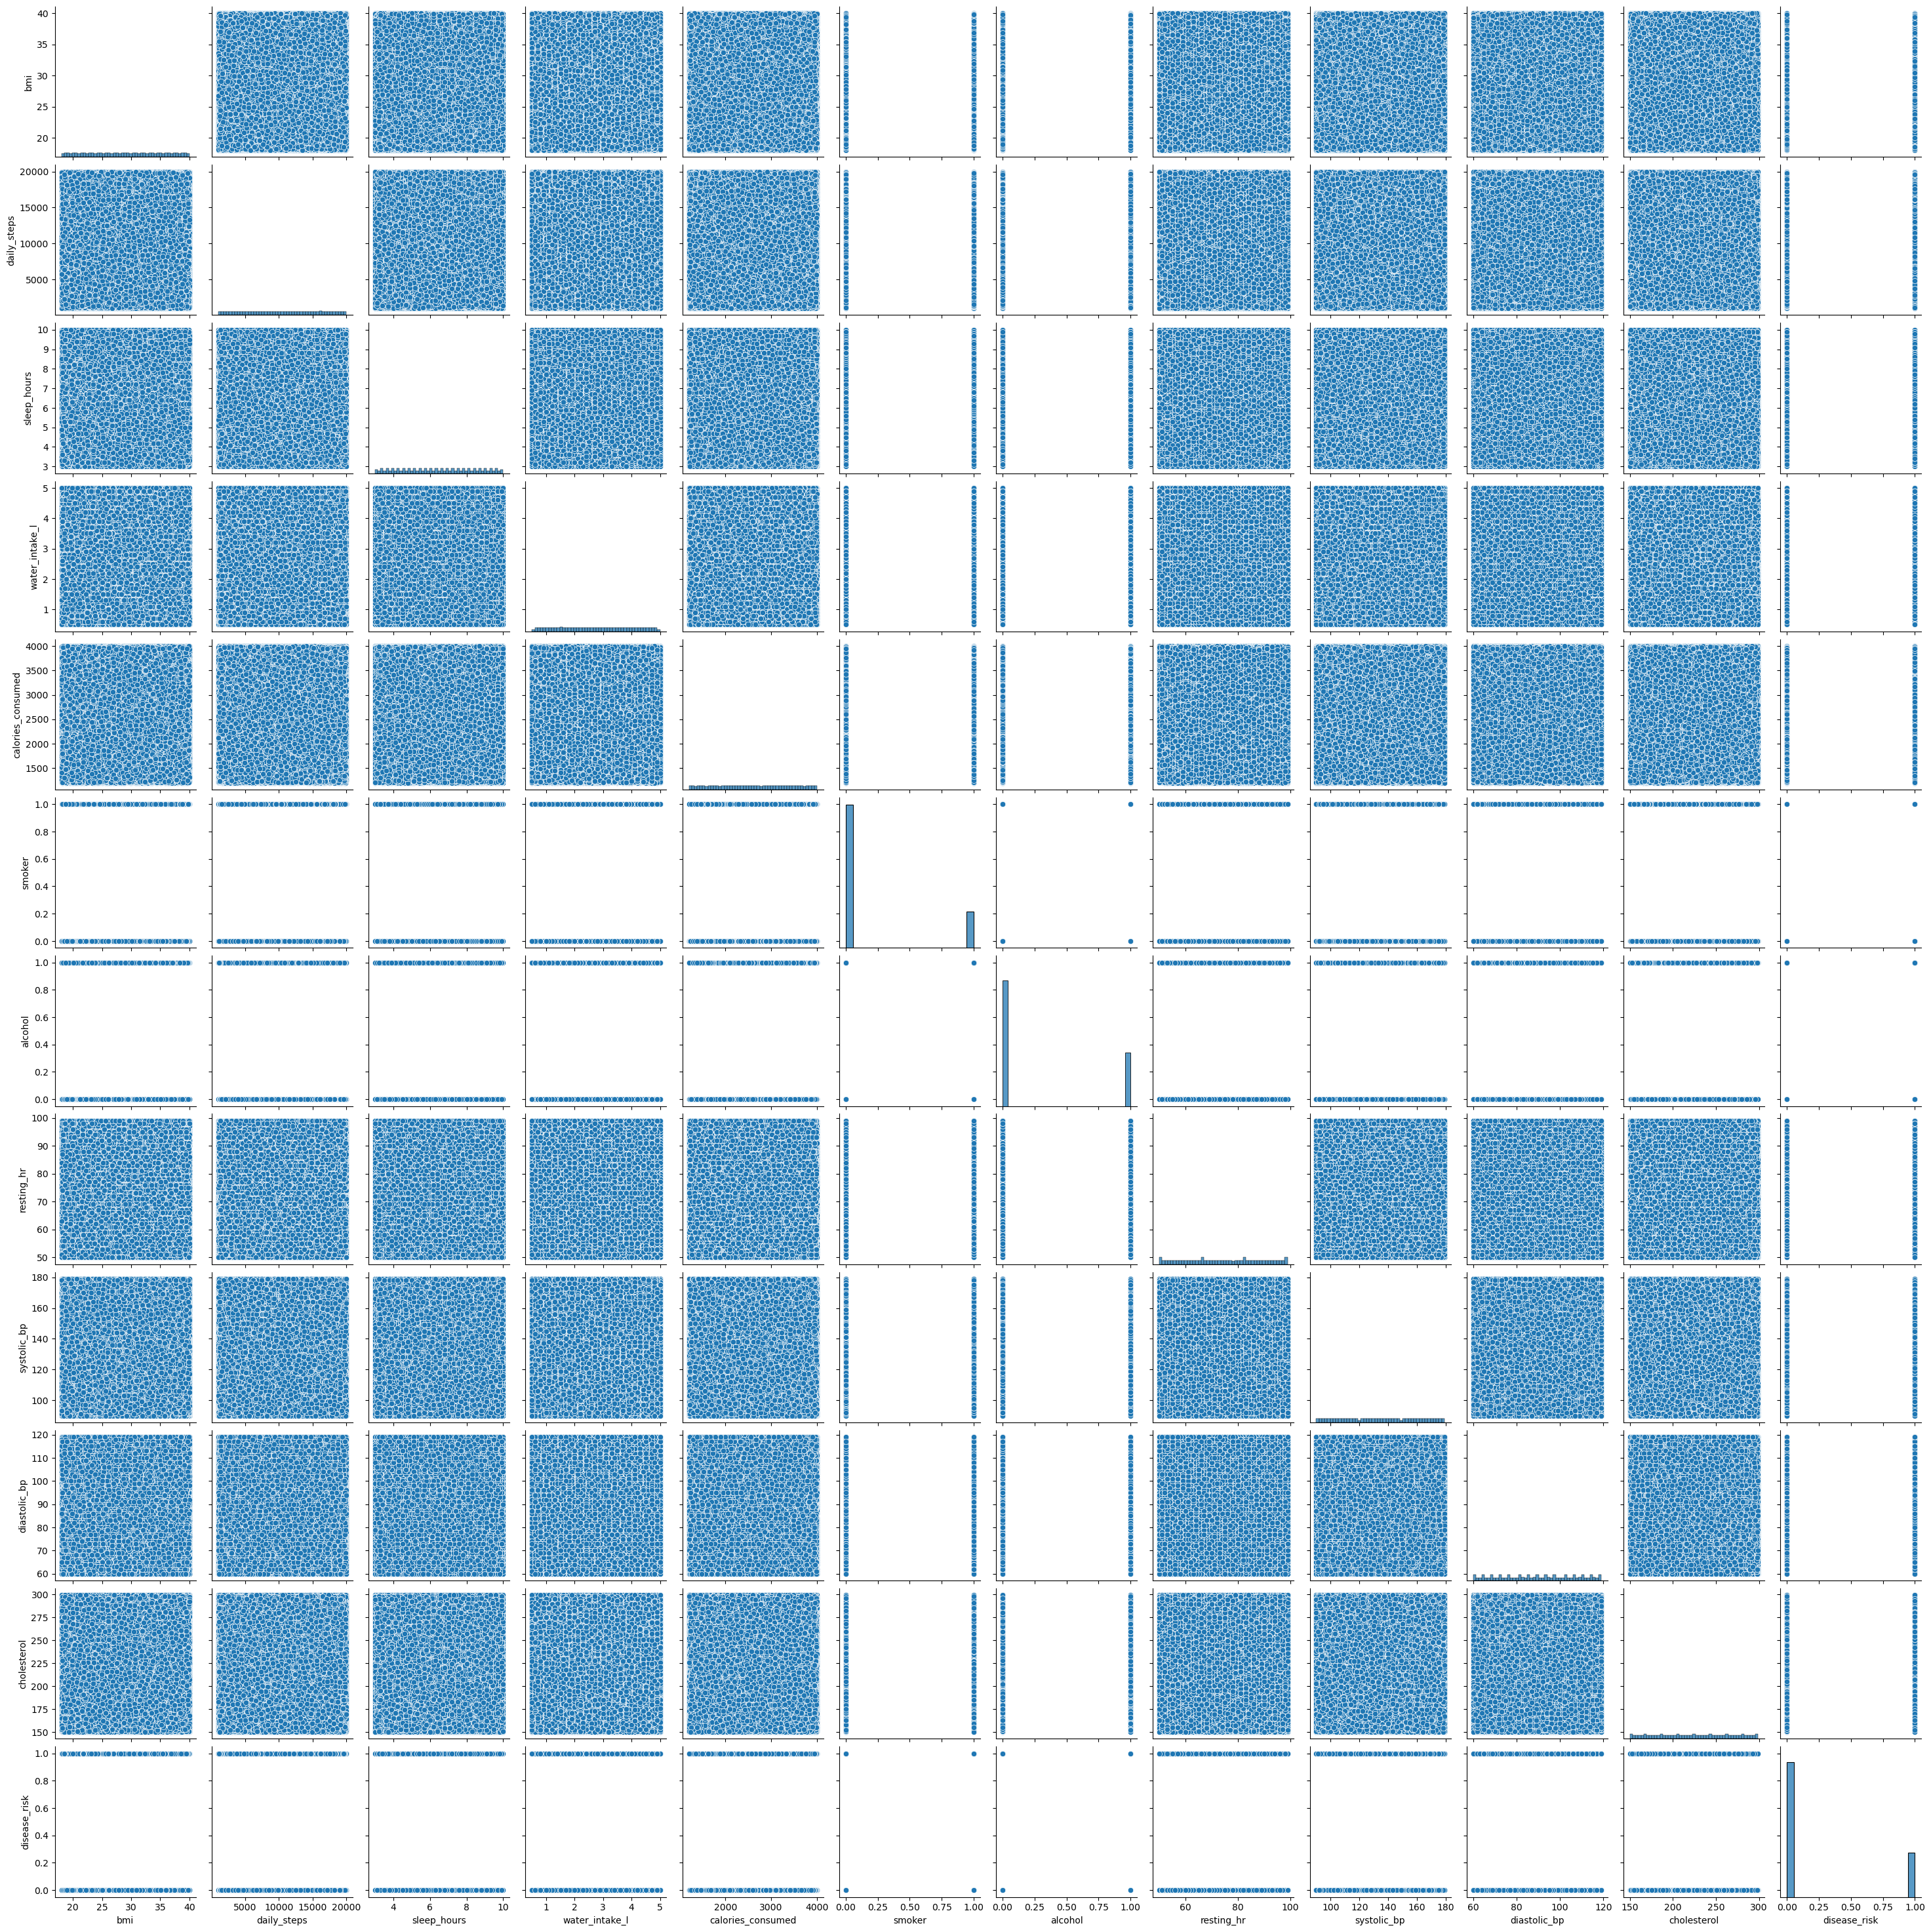

In [27]:
sns.pairplot(df_1_small)

## Health and lifestyle dataset summary

Not very usable other than for model training

## Heart disease Health indicators 

In [50]:
df_heart = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [51]:
df_heart.head(10)

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8                   1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9                   0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   
5       0.0           1.0     1.0  ...            1.0          0.0      2.0   
6       0.0           0.0     0.0  ...            1.0          0.0      3.0   
7       0.0           1.0     0.0  ...            1.0          0.0      3.0   
8       2.0           0.0     1.0  ...            1.0          0.0      5.0   
9       0.0           0.0     0.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  
5       0.0       2.0       0.0  1.0  10.0        6.0     8.0  
6       0.0      14.0       0.0  0.0   9.0        6.0     7.0  
7       0.0       0.0       1.0  0.0  11.0        4.0     4.0  
8      30.0      30.0       1.0  0.0   9.0        5.0     1.0  
9       0.0       0.0       0.0  1.0   8.0        4.0     3.0  

[10 rows x 22 columns]

In [52]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [53]:
df_heart.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [32]:
corr_df_heart = df_heart.corr()

In [59]:
import pandas as pd

Q1 = df_heart['HighBP'].quantile(0.25)
Q3 = df_heart['HighBP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_heart[(df_heart['HighBP'] >= lower_bound) & (df_heart['HighBP'] <= upper_bound)]

<AxesSubplot:>

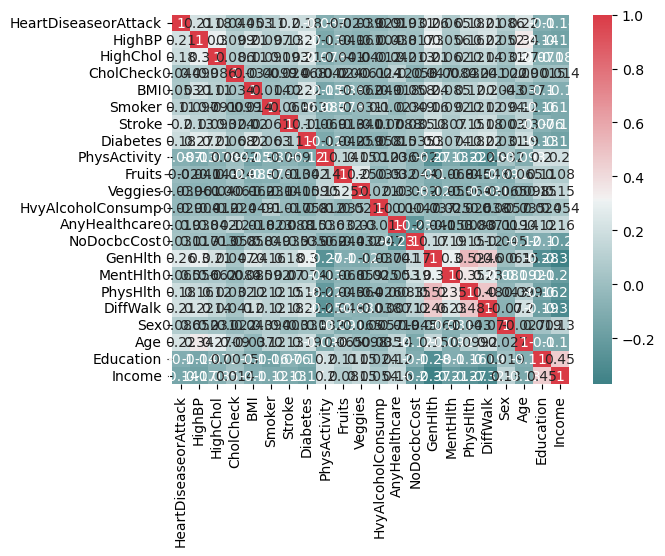

In [33]:
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_df_heart, cmap=cmap, annot=True)

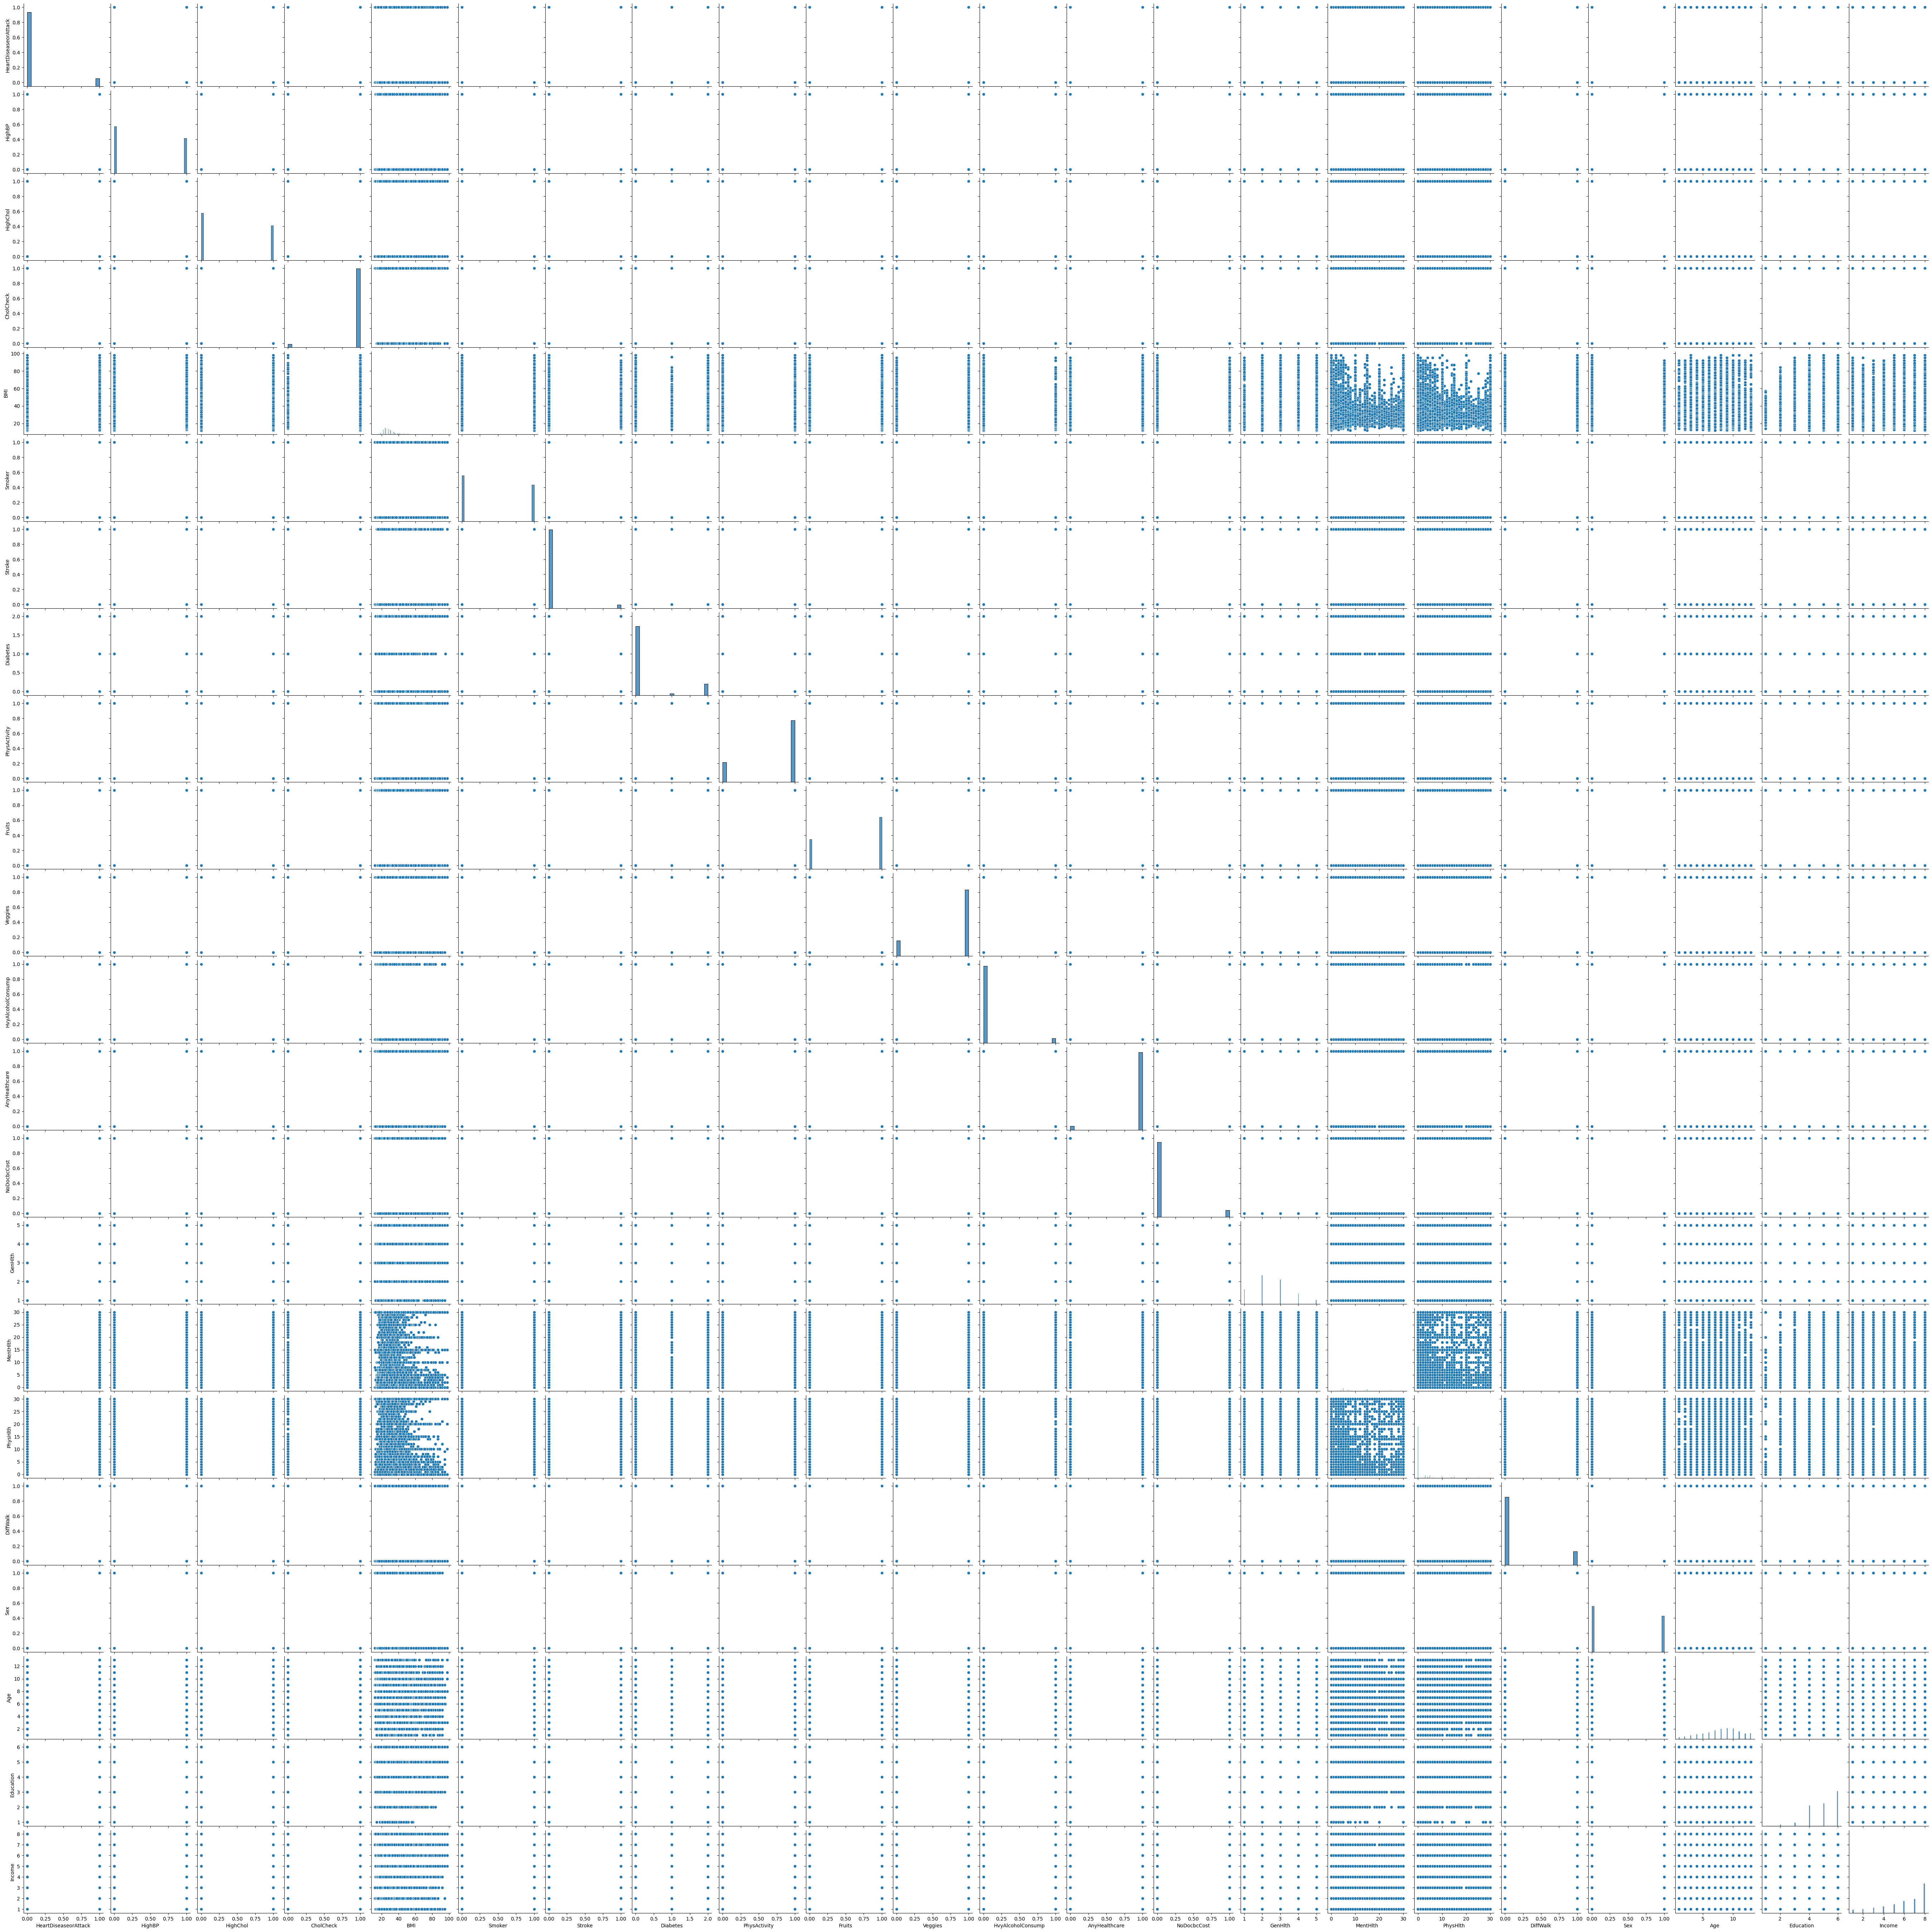

In [60]:
sns.pairplot(df_heart)

## Smartwatch df

In [61]:
df_smart= pd.read_csv("unclean_smartwatch_health_data.csv")

In [63]:
df_smart.head()

User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6

In [64]:
df_smart.describe()

User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count
count  9799.000000       9600.000000             9700.000000   9900.000000
mean   3007.480253         76.035462               97.841581   6985.685885
std    1150.581542         19.412483                1.732863   6885.809680
min    1001.000000         40.000000               90.791208      0.910138
25%    1997.500000         64.890152               96.662683   2021.039657
50%    2998.000000         75.220601               98.010642   4962.534599
75%    4004.000000         85.198249               99.376179   9724.902880
max    4999.000000        296.593970              100.000000  62486.690753

In [65]:
df_smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


Sleep Duration (hours)  shoud be int!!

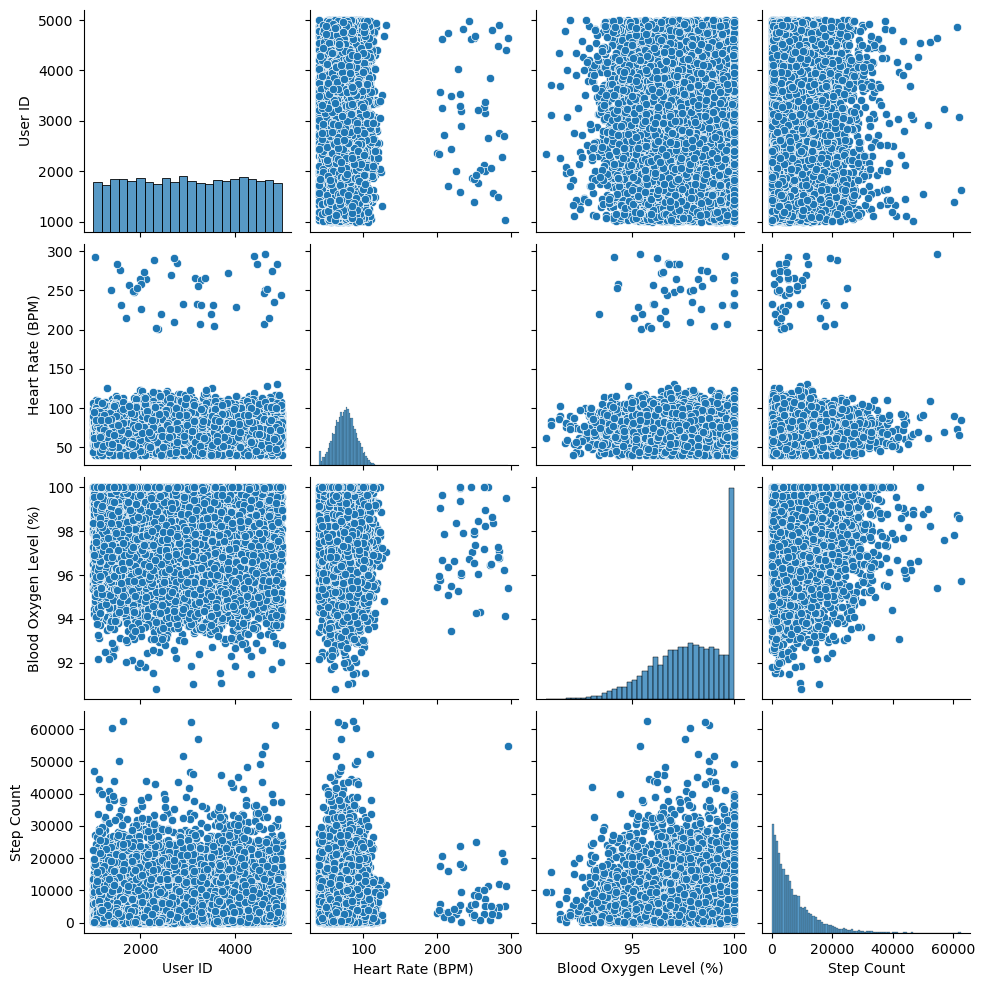

In [66]:
sns.pairplot(df_smart)

In [ ]:
for i in df_smart["Sleep Duration (hours)"]:
    if df_smart["Sleep Duration (hours)"] == "ERROR":
        df_smart["Sleep Duration (hours)"] = df_smart[i]

In [69]:
corr_df_smart = df_smart.corr()
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_df_smart, cmap=cmap, annot=True)

ValueError: could not convert string to float: 'ERROR'